## NLP

using sklearn dataset to practice machine learning algorithms and predict news categories

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

In [2]:

Dataset=fetch_20newsgroups()


# printing new categories
Dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:

News_categories=Dataset.target_names

# create Train and Test 

Train= fetch_20newsgroups(subset='train', categories=News_categories)

Test=fetch_20newsgroups(subset='test', categories=News_categories)


In [4]:
# # print one sample data from Train dataset
print (len(Train.data),'\n')
print (Train.data[3], '\n')

11314 

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters
 





### Now we have train and test and also News categories as depenedent variable (Response Variable) 

* Next step is to create a model and train model

In [5]:
# we can use Random Forrest or Naive Bayes Model , However Naive_bayes Model works better in most cases

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


# usisng Pipeline 

Model=make_pipeline(TfidfVectorizer(), MultinomialNB())

Model.fit(Train.data, Train.target)

print ( 'The accuracy of the Model is :',Model.score(Test.data, Test.target))


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


The accuracy of the Model is : 0.7738980350504514


In [6]:
# checking Model acccuracy on Train and Test 

print ('Model Score on train data', Model.score(Train.data, Train.target), '\n')
print ('Model Score on test data', Model.score(Test.data, Test.target))

Model Score on train data 0.9326498143892522 

Model Score on test data 0.7738980350504514


### Let's create another model by Random Forrest

In [7]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import  make_pipeline

RModel=make_pipeline(TfidfVectorizer(),
                     RandomForestClassifier(n_estimators=100 , n_jobs=-1,max_features=0.3 , min_samples_leaf=5 ))



RModel.fit(Train.data, Train.target)

print ( 'The accuracy of the Model is :',RModel.score(Test.data, Test.target))

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


The accuracy of the Model is : 0.6634360063728093


In [8]:


# checking Model acccuracy on Train and Test 

print ('Model Score on train data', RModel.score(Train.data, Train.target), '\n')
print ('Model Score on test data', RModel.score(Test.data, Test.target))

Model Score on train data 0.9248718401979849 

Model Score on test data 0.6634360063728093


# Optimizing model with GridSearchCSV

In [9]:




from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

NModel=Pipeline([('TF',TfidfVectorizer(stop_words='english')),
                     ('NB',MultinomialNB())])


params={'TF__ngram_range':[(1,1),(1,2),(1,3)], 'TF__max_features':[200000], 
        'TF__token_pattern':['[a-zA-Z]+','[a-zA-Z]+[0-9]+', '\w+']}






GS=GridSearchCV(NModel, params,cv=5 ,n_jobs=-1,verbose=True )


GS.fit(Train.data, Train.target)




Fitting 5 folds for each of 9 candidates, totalling 45 fits


/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/anaconda/lib/python3.6/site-packages

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('TF', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
    ...True,
        vocabulary=None)), ('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'TF__ngram_range': [(1, 1), (1, 2), (1, 3)], 'TF__max_features': [200000], 'TF__token_pattern': ['[a-zA-Z]+', '[a-zA-Z]+[0-9]+', '\\w+']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [10]:
GS.best_estimator_

Pipeline(steps=[('TF', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=200000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...True,
        vocabulary=None)), ('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [11]:
GS.best_params_

{'TF__max_features': 200000,
 'TF__ngram_range': (1, 1),
 'TF__token_pattern': '\\w+'}

In [12]:
GS.best_score_

0.8803252607389076

In [13]:
GS.score(Test.data, Test.target)

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.816250663834307

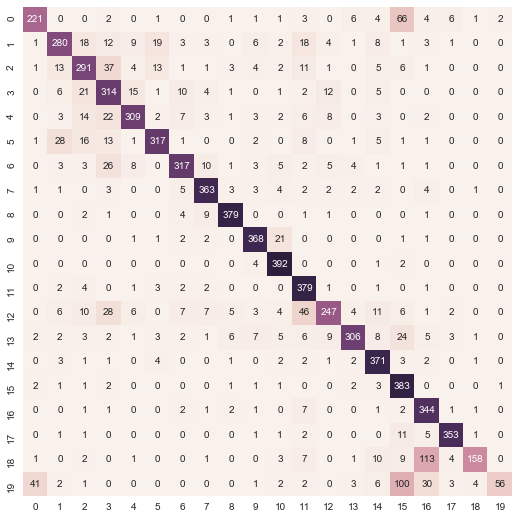

In [14]:


from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Test.target , GS.predict(Test.data))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.heatmap(confusion,square=True, annot=True , cbar=False ,fmt='d')



In [15]:



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer= TfidfVectorizer(stop_words='english' ,ngram_range=(1,1), max_features=300000,token_pattern='[a-zA-Z]+',max_df=0.9)

X_train=vectorizer.fit_transform(Train.data)


X_test=vectorizer.transform(Test.data)


NB= MultinomialNB()

NB.fit(X_train, Train.target)

NB.score(X_test, Test.target)

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.8170472650026553

In [16]:
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg',
 'aaaaagggghhhh',
 'aaaarrgghhhh',
 'aaah',
 'aaahh',
 'aaahhhh',
 'aaai',
 'aab',
 'aacc',
 'aachen',
 'aacvkc',
 'aad',
 'aaef',
 'aaf',
 'aafc',
 'aah',
 'aai',
 'aaj',
 'aalac',
 'aalborg',
 'aaldoubo',
 'aalm',
 'aalternate',
 'aam',
 'aamazing',
 'aamir',
 'aammmaaaazzzzzziinnnnggggg',
 'aamrl',
 'aams',
 'aan',
 'aanbieden',
 'aanerud',
 'aangeboden',
 'aangegeven',
 'aangezien',
 'aanp',
 'aantal',
 'aao',
 'aaoepp',
 'aaos',
 'aap',
 'aaph',
 'aaplay',
 'aar',
 'aardvark',
 'aargh',
 'aarghhhh',
 'aarhus',
 'aario',
 'aarnet',
 'aaron',
 'aaronc',
 'aaronson',
 'aarp',
 'aarseth',
 'aarskog',
 'aart',
 'aas',
 'aasked',
 'aatchoo',
 'aau',
 'aauwpiugyv',
 'aav',
 'aavb',
 'aavso',
 'aaw',
 'aax',
 'aayau',
 'aazaadee',
 'aazo',
 'ab',
 'aba',
 'ababs',
 'abacus',
 'abad',
 'abaihm',
 'abandon',
 'abandond',
 'abandonded',
 'abandoned',
 'abandoning',
 'a

In [17]:

# lets find out wich words used in each category


word={}


for i,j in zip(Dataset.target_names, range(len(Dataset.target_names))):
    word[i]=NB.feature_count_[j,:]
         

WORDS=pd.DataFrame(word, index=vectorizer.get_feature_names())
print (WORDS.shape) 

WORDS.head(8)

(88722, 20)


,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
aa,0.108049,0.062006,0.276198,0.405177,0.467699,1.523163,0.743409,0.377678,0.045102,0.935175,0.180103,0.384914,0.685143,0.29199,0.584006,1.317194,0.081124,1.613729,1.240282,0.105989
aaa,0.128637,0.000000,0.000000,0.000000,0.055485,0.000000,0.081541,0.260009,0.000000,3.714526,0.000000,0.033691,0.183404,0.00000,0.000000,0.000000,0.039908,0.000000,0.066405,0.684117
aaaa,0.000000,0.213702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aaaaaaaaaaaa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.066880,0.000000
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109297,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aaaaagggghhhh,0.000000,0.000000,0.135867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aaaarrgghhhh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.191867,0.000000,0.000000
aaah,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.201065,0.000000,0.000000,0.000000


In [18]:


WORDS.sort_values(by='alt.atheism', ascending=False).head(12)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
keith,23.367022,0.053361,0.486386,0.615591,0.327478,0.391951,0.745538,0.564219,1.143476,1.314873,3.249003,0.021294,0.676629,0.957855,0.309783,0.000000,0.600597,0.000000,0.211315,1.068243
edu,22.521301,16.479398,19.648465,15.496969,21.629934,13.164791,21.706078,18.536324,15.798009,29.813331,18.963072,13.891011,17.266738,21.349070,19.331341,18.064396,20.630540,17.707288,17.165266,11.950415
god,20.986810,0.447024,0.120559,0.441734,0.135914,0.195535,0.297577,0.415319,1.163434,0.563090,0.356399,0.199622,0.207793,0.127260,0.291847,46.665591,1.379283,1.764739,1.416198,16.011052
t,18.075957,8.287018,11.095340,11.441640,10.751342,7.075437,5.390898,16.297026,13.915930,15.197209,14.122729,17.996696,10.758484,13.583415,11.799371,15.953625,19.188860,11.139336,14.937821,11.350286
caltech,15.857346,0.661629,0.313417,0.070741,0.167795,0.049633,0.207029,1.032100,0.197430,0.517673,0.000000,1.238725,1.509523,1.191529,1.989383,0.400328,3.451874,0.000000,0.794021,0.229346
atheists,14.255556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.562330,0.000000,0.000000,0.000000,0.299173
livesey,13.663068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.019992
s,13.577964,8.332064,10.515677,11.829637,11.559729,8.271400,7.677715,14.972350,15.193500,20.186515,19.113374,18.626883,11.160723,15.047981,14.440419,21.043463,17.290219,14.914125,17.001858,10.776067
com,12.746837,9.502108,11.155407,15.298080,8.399186,14.595444,8.741751,20.004571,24.039779,10.693536,5.445025,21.929254,12.640768,15.695157,11.576342,7.837458,19.487083,8.840225,15.684578,11.825651
atheism,12.543604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.089563,0.000000,0.000000,0.000000,0.588336


In [19]:



WORDS.sort_values(by='comp.sys.mac.hardware', ascending=False).head(12)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
mac,1.033349,4.344303,1.437582,1.766221,25.673257,0.398436,1.968343,0.351723,0.120787,0.183725,0.265761,0.623139,0.823533,0.273270,0.814439,0.633948,0.096029,0.000000,0.000000,0.064755
apple,3.317743,1.162267,0.116176,0.706126,22.882404,0.137625,1.754078,0.253148,1.552462,0.115398,0.491101,0.393122,1.267255,0.307694,0.724504,0.114620,1.156387,0.033415,0.452258,6.661191
edu,22.521301,16.479398,19.648465,15.496969,21.629934,13.164791,21.706078,18.536324,15.798009,29.813331,18.963072,13.891011,17.266738,21.349070,19.331341,18.064396,20.630540,17.707288,17.165266,11.950415
drive,0.290903,0.739496,3.035114,22.096016,12.218631,0.575354,8.203468,5.726805,2.662987,0.565084,0.090850,0.998093,1.753887,0.118118,0.958056,0.335075,0.923608,0.292883,0.531292,0.373230
quadra,0.000000,0.822152,0.000000,0.429075,11.742554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s,13.577964,8.332064,10.515677,11.829637,11.559729,8.271400,7.677715,14.972350,15.193500,20.186515,19.113374,18.626883,11.160723,15.047981,14.440419,21.043463,17.290219,14.914125,17.001858,10.776067
t,18.075957,8.287018,11.095340,11.441640,10.751342,7.075437,5.390898,16.297026,13.915930,15.197209,14.122729,17.996696,10.758484,13.583415,11.799371,15.953625,19.188860,11.139336,14.937821,11.350286
centris,0.000000,0.695849,0.000000,0.000000,10.318557,0.000000,0.087521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
se,0.191480,2.022067,0.292944,1.779877,9.926767,2.235033,0.490354,2.518202,0.594848,0.000000,1.642107,0.563680,0.506423,0.830566,0.969429,0.098678,0.508218,1.520168,0.079661,0.595750
monitor,0.000000,1.057212,1.314560,8.944489,9.917934,0.924282,4.700257,0.088171,0.000000,0.000000,0.000000,1.258170,1.607995,0.095792,0.375719,0.000000,0.029014,0.000000,0.000000,0.000000


In [20]:

popular_words={}

for i in WORDS.columns:
    popular_words[i]=WORDS.sort_values(by=i, ascending=False).head(50).index
    

In [21]:
common_words=pd.DataFrame(popular_words)
common_words

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
0,keith,graphics,windows,scsi,mac,x,sale,car,bike,edu,hockey,key,edu,pitt,space,god,gun,israel,edu,god
1,edu,edu,edu,drive,apple,window,edu,com,com,s,team,clipper,com,edu,nasa,jesus,edu,israeli,s,sandvik
2,god,x,file,ide,edu,motif,offer,cars,dod,baseball,game,encryption,s,geb,edu,s,guns,jews,com,jesus
3,t,image,dos,card,drive,mit,shipping,edu,edu,year,ca,chip,t,banks,henry,christians,com,turkish,cramer,edu
4,caltech,d,win,edu,quadra,server,new,t,s,t,s,com,use,gordon,moon,edu,t,armenian,t,com
5,atheists,files,files,com,s,com,university,s,t,team,edu,s,power,msg,alaska,church,s,edu,optilink,t
6,livesey,com,driver,bus,t,r,distribution,engine,ride,game,nhl,keys,circuit,com,s,bible,people,armenians,people,christian
7,s,university,drivers,mb,centris,edu,condition,article,bikes,players,play,t,ca,s,access,christian,fbi,s,clinton,s
8,com,polygon,com,controller,se,o,price,writes,article,games,t,escrow,university,t,orbit,t,stratus,arab,writes,kent
9,atheism,thanks,t,pc,monitor,widget,forsale,oil,ca,runs,players,government,host,cs,digex,christ,batf,people,article,morality


========================================================================================

# WOrdClound

In [22]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

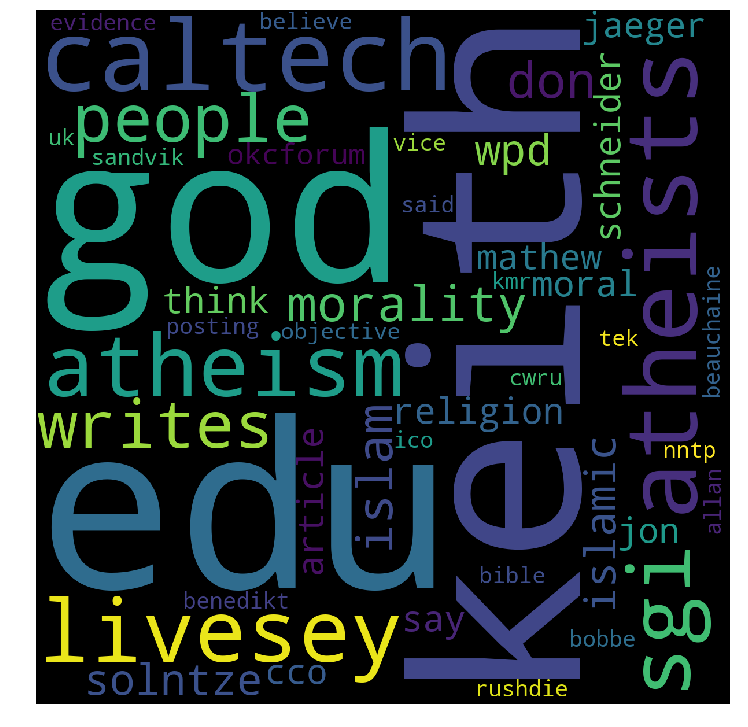

In [23]:
stopwords=set(STOPWORDS)

Words_bag=' '

for word in common_words['alt.atheism']:
    Words_bag=Words_bag+str(word)+' '
    
    

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(Words_bag)


# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [24]:

from ipywidgets import interact

stopwords=set(STOPWORDS)


def plotter(i):
    Words_bag=' '
    for word in common_words[i]:
        Words_bag=Words_bag+str(word)+' '
    
    wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(Words_bag)


    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    



interact(plotter , i=common_words.columns)

interactive(children=(Dropdown(description='i', options=('alt.atheism', 'comp.graphics', 'comp.os.ms-windows.m…

<function __main__.plotter(i)>



# Tunning model


In [25]:
import nltk
import string 

import re

# import lemmatizer

lem=nltk.WordNetLemmatizer()

stopwords=nltk.corpus.stopwords.words('english')
stopwords

def cleaning(x):
    #1st step remove punct and join list
    remove_punc=''.join([char for char in x if x not in string.punctuation])
    
    # 2n remove tokenized using spli('\w+')
    
    token=re.split('\W+', remove_punc.lower())  # .lower() is very important
    
    #3rd remove stop words , imported before from ntltk.corpuse.stopwords
    
    clean_token=[word for word in token if word not in stopwords]
    
    # 4rd lemmetize or we can use stemming but we need to import them outside this function
    
    cleaned=[lem.lemmatize(word) for word in clean_token]
    
    
    
    # return final result
    
    return cleaned

In [ ]:
lem.lemmatize('ranning')

In [ ]:


from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

NModel=Pipeline([('CV',CountVectorizer(analyzer=cleaning)),
                     ('NB',MultinomialNB())])


params={'CV__ngram_range':[(1,1),(1,2),(1,3)]
        }






GS=GridSearchCV(NModel, params,cv=5 ,n_jobs=-1,verbose=True )


GS.fit(Train.data, Train.target)


In [ ]:
GS.best_estimator_

In [ ]:
GS.best_score_

In [ ]:
GS.best_params_

# gradient Booting

In [ ]:


from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier()

GB

In [ ]:
vectorizer= TfidfVectorizer(stop_words='english' ,ngram_range=(1,1), max_features=60000,token_pattern='[a-zA-Z]+',max_df=0.9)

X_train=vectorizer.fit_transform(Train.data).toarray()

X_Train=pd.DataFrame(X_train)

X_test=vectorizer.transform(Test.data).toarray()

X_Test=pd.DataFrame(X_test)




In [ ]:


def train_GB(est,depth, lr):
    
    GB=GradientBoostingClassifier(n_estimators=est, max_depth=depth, learning_rate=lr)
    GB.fit(X_Train, Train.target)
    score=GB.score(X_Test, Test.target)
    print ('score :',score, est, dept , lr)
    

In [ ]:
score=[]

for est in [100, 150]:
    for depth in [3,5]:
        for lr in [0.01]:
            train_GB(est,depth, lr)
            

In [ ]:
vectorizer= TfidfVectorizer(stop_words='english' ,ngram_range=(1,1), max_features=300000,token_pattern='[a-zA-Z]+',max_df=0.9)

X_train=vectorizer.fit_transform(Train.data)

X_test=vectorizer.transform(Test.data)




GB=GradientBoostingClassifier(n_estimators=100, max_depth=7, learning_rate=0.04)
GB.fit(X_train, Train.target)
GB.score(X_test, Test.target)

In [ ]:

import nltk
import string 

import re

# import lemmatizer

lem=nltk.WordNetLemmatizer()

stopwords=nltk.corpus.stopwords.words('english')
stopwords

def cleaning(x):
    #1st step remove punct and join list
    remove_punc=''.join([char for char in x if x not in string.punctuation])
    
    # 2n remove tokenized using spli('\w+')
    
    token=re.split('\W+', remove_punc.lower())  # .lower() is very important
    
    #3rd remove stop words , imported before from ntltk.corpuse.stopwords
    
    clean_token=[word for word in token if word not in stopwords]
    
    # 4rd lemmetize or we can use stemming but we need to import them outside this function
    
    cleaned=[lem.lemmatize(word) for word in clean_token]
    
    
    
    # return final result
    
    return cleaned

from sklearn.feature_extraction.text import TfidfVectorizer


TF=TfidfVectorizer(ngram_range=(1,1), max_features=100000, token_pattern='[a-zA-Z]+', stop_words='english') 

vect=TF.fit_transform(Train.data)

tf_d=pd.DataFrame(vect.toarray())

test_vect=TF.transform(Test.data).toarray()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier()

GB

In [ ]:
# lr is learning rate , no n_jobs itsnot parrarel
def train_GB(est,depth,lr):
    GB=GradientBoostingClassifier(n_estimators=est, learning_rate=lr, max_depth=depth)
    GB.fit(vect,Train.target)
    score=GB.score(test_vect, Test.target)
    
    print ('results :', est, depth ,lr , f'score{score}')
    

In [ ]:
for est in range(50,150,40):
    for depth in [3,7]:
        for lr in [0.01, 0.4]:
            train_GB(est,depth,lr)

In [ ]:
Train.data

In [ ]:
train_GB(60,10,0.05)

In [ ]:
%timeit train_GB(60,10,0.05)